# 6. Interrogation du DNS avec Python

### 1. On utilise le module Python socket afin de résoudre www.iutbeziers.fr en adresse IP.

In [1]:
import socket
print(socket.gethostbyname('www.iutbeziers.fr'))

194.199.227.80


### 2. On utilise le module dnspython afin de résoudre www.iutbeziers.fr en adresse IP et reciproquement.

In [63]:
import dns.resolver
import dns.reversename as rvrname

rslv = dns.resolver.Resolver()

ipqry = rslv.query('www.iutbeziers.fr')
ip  = qry[0].address
rvqry = rvrname.from_address(ip)
rv = rslv.query(rvqry,'PTR')

print("IP : ", ip )
print("URL: ", rv[0])

IP :  194.199.227.80
URL:  www.iutbeziers.fr.


### 3. On donne la liste des NS, des MX du domaine iutbeziers.fr.

#### NS.

In [61]:
import dns.resolver as rslv

dnsQry = rslv.query('iutbeziers.fr', 'NS')

for res in dnsQry:
    print(res)

scribe.iutbeziers.fr.


#### MX

In [62]:
import dns.resolver as rslv

dnsQry = rslv.query('iutbeziers.fr', 'MX')

for res in dnsQry:
    print(res)

10 mail.iutbeziers.fr.


### 4. On retrouve le resolver de votre container.

In [ ]:
import dns.resolver

rsvl = dns.resolver.Resolver()
    
print(rsvl.nameservers)

### 5. Utilisez le module dns2python afin de vérifier que les zones renvoyées en axfr par les DNS du domaine "zonetransfert.me." sont bien identiques/

# 7. Scapy un package Python pour tester votre sécurité

###  EXo1 SCAN de port: Script permettant de scanner les ports de 1 à 1024 des machines de la salle

In [15]:
from scapy.all import *
import logging
logging.getLogger("scapy.runtime").setLevel(logging.ERROR)

src_port = RandShort()

print("Scan en cours...")

for i in range(6, 7):
    dst_ip = "10.203.%d.1" % (i)
    print("Host", dst_ip)
    
    for dst_port in range(1, 1025):
        tcp_connect_scan_resp = sr1(IP(dst=dst_ip)/TCP(sport=src_port,dport=dst_port,flags="S"),timeout=15, verbose=0 )

        if(str(type(tcp_connect_scan_resp))=="<class 'NoneType'>"):
            print("Port ", dst_port, "NoneType")
        elif(tcp_connect_scan_resp.haslayer(TCP)):
            if(tcp_connect_scan_resp.getlayer(TCP).flags == 0x12):
                send_rst = sr(IP(dst=dst_ip)/TCP(sport=src_port,dport=dst_port,flags="AR"),timeout=10, verbose=0 )
                print("Port ", dst_port, "isOpen")
            #elif (tcp_connect_scan_resp.getlayer(TCP).flags == 0x14):
             #   print( dst_ip, "P: ", dst_port, "isClosed")
                
    print("-----------------------------------")
           
print("Scan terminé.")


Scan en cours...
Host 10.203.6.1
Port  22 isOpen
Port  111 isOpen
Port  902 isOpen
-----------------------------------
Scan terminé.


^^^ Exemple avec l'@IP : 10.203.6.1 ^^^

### Exo2 Requête SNMP: Script permettant d'afficher et de recueillir desinformations sur les kernels Linux des serveurs de l'IUT ( Vérifiez que le port 161 udp est ouvert et passez votre requête )

In [14]:
from scapy.all import *
import logging
logging.getLogger("scapy.runtime").setLevel(logging.ERROR)

src_port = RandShort()
dst_port = 161
dst_ip = "10.255.255.135"

#p = IP(dst="10.255.255.135")/UDP(sport=161)/SNMP(community="publicbeziers",PDU=SNMPget(varbindlist=[SNMPvarbind(oid=ASN1_OID("1.3.6.1.2.1.1.1.0"))]))
#print(sr1(p))

udp_scan_resp = sr1(IP(dst=dst_ip)/UDP(dport=dst_port),timeout=10 )
    
if (str(type(udp_scan_resp))=="<class 'NoneType'>"):
    print("Port ", dst_port, "NoneType")
elif (udp_scan_resp.haslayer(UDP)):
    print("Port ", dst_port, "isOpen")
elif(udp_scan_resp.haslayer(ICMP)):
    if(int(udp_scan_resp.getlayer(ICMP).type)==3):
        print("Port ", dst_port, "Closed")
    elif(int(udp_scan_resp.getlayer(ICMP).type)==3 and int(udp_scan_resp.getlayer(ICMP).code) in [1,2,9,10,13]):
        print("Port ", dst_port, "Filtered")


Begin emission:
Finished sending 1 packets.

Received 6 packets, got 0 answers, remaining 1 packets
Port  161 NoneType


### Exo 3 Modifiez ce script qui sniffe le réseau avec une fonction de callback qui affiche les sources/dest IP afin qu'il affiche aussi les ports sources et destination ainsi que le type de paquets

In [2]:
from collections import Counter
from scapy.all import sniff
 
packet_counts = Counter()
 
#Packet #1: proto: TCP 192.168.16.2 ==> 10.255.255.135 sport: 45910 ==>  dport:80 
    
def custom_action(packet):
    key = tuple(sorted([packet[0][1].src, packet[0][1].dst]))
    packet_counts.update([key])
    #packet.show()
    #return f"Packet #{sum(packet_counts.values())}: {packet[0][1].src} ==> {packet[0][1].dst}"
    return f"Packet #{sum(packet_counts.values())}: proto: {packet[0][1].proto} {packet[0][1].src} ==> {packet[0][1].dst} sport: {packet[0][1].sport}  ==> {packet[0][1].dport} "
    
sniff(filter="ip", prn=custom_action, count=10)
 
print("\n".join(f"{f'{key[0]} <--> {key[1]}'}: {count}" for key, count in packet_counts.items()))

Packet #1: proto: 6 192.168.122.1 ==> 172.18.0.2 sport: 45022  ==> 8888 
Packet #2: proto: 6 172.18.0.2 ==> 192.168.122.1 sport: 8888  ==> 45022 
Packet #3: proto: 6 192.168.122.1 ==> 172.18.0.2 sport: 45022  ==> 8888 
Packet #4: proto: 6 172.18.0.2 ==> 192.168.122.1 sport: 8888  ==> 45038 
Packet #5: proto: 6 192.168.122.1 ==> 172.18.0.2 sport: 45038  ==> 8888 
Packet #6: proto: 6 172.18.0.2 ==> 192.168.122.1 sport: 8888  ==> 45038 
Packet #7: proto: 6 192.168.122.1 ==> 172.18.0.2 sport: 45038  ==> 8888 
Packet #8: proto: 6 192.168.122.1 ==> 172.18.0.2 sport: 45024  ==> 8888 
Packet #9: proto: 6 172.18.0.2 ==> 192.168.122.1 sport: 8888  ==> 45024 
Packet #10: proto: 6 192.168.122.1 ==> 172.18.0.2 sport: 45026  ==> 8888 
172.18.0.2 <--> 192.168.122.1: 10


# 8.2 Utilisation du package telnetlib pour se connecter au routeur Cisco

#### 1. Tout d’abord on configure l'adressage IP et l’accès telnet sur notre routeur Cisco :

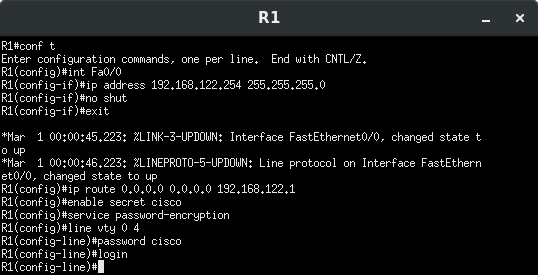

#### 2. On utilise le code suivant pour nous connecter en telnet sur le container depuis notre container python :

In [10]:
import sys
import telnetlib
import time

HOST = "192.168.122.254"
password = "cisco"
command = "sh ver"
term = "term len 0"
tn = telnetlib.Telnet(HOST)
cmd1 = "enable"

tn.set_debuglevel(1)
time.sleep(2)

tn.read_until(b"Password: ")
tn.write(password.encode('ascii') + b"\n")

time.sleep(2)

tn.write(cmd1.encode('ascii') + b"\n")

time.sleep(2)

tn.write(password.encode('ascii') + b"\n")

time.sleep(2)

tn.write(term.encode('ascii') + b"\n")
tn.write(command.encode('ascii') + b"\n")

time.sleep(2)

tn.write(b"\n")

time.sleep(2)

tn.write(b"\n")
time.sleep(2)
tn.write(b"exit\n")

lastpost = tn.read_all().decode('ascii')

print(lastpost)
op=open ("output.txt", "a").write(lastpost)

tn.close()

Telnet(192.168.122.254,23): recv b'\xff\xfb\x01\xff\xfb\x03\xff\xfd\x18\xff\xfd\x1f\r\n\r\nUser Access Verification\r\n\r\nPasswo'
Telnet(192.168.122.254,23): IAC WILL 1
Telnet(192.168.122.254,23): IAC WILL 3
Telnet(192.168.122.254,23): IAC DO 24
Telnet(192.168.122.254,23): IAC DO 31
Telnet(192.168.122.254,23): recv b'rd: '
Telnet(192.168.122.254,23): send b'cisco\n'
Telnet(192.168.122.254,23): send b'enable\n'
Telnet(192.168.122.254,23): send b'cisco\n'
Telnet(192.168.122.254,23): send b'term len 0\n'
Telnet(192.168.122.254,23): send b'sh ver\n'
Telnet(192.168.122.254,23): send b'\n'
Telnet(192.168.122.254,23): send b'\n'
Telnet(192.168.122.254,23): send b'exit\n'
Telnet(192.168.122.254,23): recv b'\xff\xfc\x01\xff\xfc\x03\xff\xfe\x18\xff\xfe\x1f\r\nR1>enable\r\nPassword: \r\nR1#term len 0'
Telnet(192.168.122.254,23): IAC WONT 1
Telnet(192.168.122.254,23): IAC WONT 3
Telnet(192.168.122.254,23): IAC DONT 24
Telnet(192.168.122.254,23): IAC DONT 31
Telnet(192.168.122.254,23): recv b'\r\n

#### 3. On compléte le programme précédent afin de mettre en place un accès SSH sur notre routeur Cisco :

In [11]:
import sys
import telnetlib
import time

HOST = "192.168.122.254"
enbl = "enable"
password = "cisco"
term = "term len 0"
tn = telnetlib.Telnet(HOST)

coft = "conf t"
hstn = "hostname R-KURO"
ipdm = "ip domain-name mesnil.fr"
cryp = "crypto key generate rsa general-keys modulus 2048"
anew = "aaa new-model"
urss = "username kuro secret rootroot"
aath = "aaa authentication enable default line"
endc = "end"
wrmm = "wr mem" 

tn.set_debuglevel(1)
time.sleep(2)

tn.read_until(b"Password: ")
tn.write(password.encode('ascii') + b"\n")

time.sleep(2)

tn.write(enbl.encode('ascii') + b"\n")

time.sleep(2)

tn.write(password.encode('ascii') + b"\n")

time.sleep(2)

tn.write(term.encode('ascii') + b"\n")
tn.write(coft.encode('ascii') + b"\n")
tn.write(hstn.encode('ascii') + b"\n")
tn.write(ipdm.encode('ascii') + b"\n")
tn.write(cryp.encode('ascii') + b"\n")
tn.write(anew.encode('ascii') + b"\n")
tn.write(urss.encode('ascii') + b"\n")
tn.write(aath.encode('ascii') + b"\n")
tn.write(endc.encode('ascii') + b"\n")
tn.write(wrmm.encode('ascii') + b"\n")

time.sleep(2)

tn.write(b"\n")
time.sleep(2)
tn.write(b"\n")
time.sleep(2)
tn.write(b"exit\n")

lastpost = tn.read_all().decode('ascii')

print(lastpost)
op=open ("output.txt", "a").write(lastpost)

tn.close()

Telnet(192.168.122.254,23): recv b'\xff\xfb\x01\xff\xfb\x03\xff\xfd\x18\xff\xfd\x1f\r\n\r\nUser Access Verification\r\n\r\nPasswo'
Telnet(192.168.122.254,23): IAC WILL 1
Telnet(192.168.122.254,23): IAC WILL 3
Telnet(192.168.122.254,23): IAC DO 24
Telnet(192.168.122.254,23): IAC DO 31
Telnet(192.168.122.254,23): recv b'rd: '
Telnet(192.168.122.254,23): send b'cisco\n'
Telnet(192.168.122.254,23): send b'enable\n'
Telnet(192.168.122.254,23): send b'cisco\n'
Telnet(192.168.122.254,23): send b'term len 0\n'
Telnet(192.168.122.254,23): send b'conf t\n'
Telnet(192.168.122.254,23): send b'hostname R-KURO\n'
Telnet(192.168.122.254,23): send b'ip domain-name mesnil.fr\n'
Telnet(192.168.122.254,23): send b'crypto key generate rsa general-keys modulus 2048\n'
Telnet(192.168.122.254,23): send b'aaa new-model\n'
Telnet(192.168.122.254,23): send b'username kuro secret rootroot\n'
Telnet(192.168.122.254,23): send b'aaa authentication enable default line\n'
Telnet(192.168.122.254,23): send b'end\n'
Tel

#### 4. On vérifie que depuis le container Python3 on accède bien au routeur en SSH en s'authentifiant :

student@b2d7c3f7d519:~/python$ ssh -oKexAlgorithms=+diffie-hellman-group1-sha1 -c aes128-cbc kuro@192.168.122.254
The authenticity of host '192.168.122.254 (192.168.122.254)' can't be established.
RSA key fingerprint is SHA256:u6YA9q2kAHwNE9i+OLWJuNpa5szKXTC/4EIde8HNK+s.
Are you sure you want to continue connecting (yes/no)? yes
Warning: Permanently added '192.168.122.254' (RSA) to the list of known hosts.
Password: 

R-KURO>enable
Password: 
R-KURO#show run 
Building configuration...

Current configuration : 1147 bytes
!
version 12.4
service timestamps debug datetime msec
service timestamps log datetime msec
service password-encryption
!
hostname R-KURO
!
boot-start-marker
boot-end-marker
!
enable secret 5 $1$7wyF$ZD0jkd1oGdaQd/OZvldf4/
!
aaa new-model
!
!
aaa authentication enable default line
!
aaa session-id common
memory-size iomem 5
no ip icmp rate-limit unreachable
ip cef
!
!         
!
!
no ip domain lookup
ip domain name mesnil.fr
ip auth-proxy max-nodata-conns 3
ip admission max-nodata-conns 3
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
username kuro secret 5 $1$w4Ds$wStfFKjO.88hMvUmwFT3u.
!         
!
ip tcp synwait-time 5
! 
!
!
!
!
interface FastEthernet0/0
 ip address 192.168.122.254 255.255.255.0
 duplex auto
 speed auto
!
interface FastEthernet0/1
 no ip address
 shutdown
 duplex auto
 speed auto
!
ip forward-protocol nd
ip route 0.0.0.0 0.0.0.0 192.168.122.1
!
!
no ip http server
no ip http secure-server
!         
no cdp log mismatch duplex
!
!
!
control-plane
!
!
!
!
!
!
!
!
!
!
line con 0
 exec-timeout 0 0
 privilege level 15
 logging synchronous
line aux 0
 exec-timeout 0 0
 privilege level 15
 logging synchronous
line vty 0 4
 password 7 030752180500
!
!
end

R-KURO#

# 8.3   Utilisation du package paramiko pour passer une commande sur un node système ou réseau

#### 1. On utilise le package Netmiko pour afficher le résutat de la commande "show ip interfaces brief" sur notre routeur Cisco :

In [5]:
import sys, paramiko

def shIntBrief(host):

    user = "kuro"
    pasw = "rootroot"
    port = 22
    cmnd = "show ip interface brief"

    try:
        client = paramiko.SSHClient()
        client.load_system_host_keys()
        client.set_missing_host_key_policy(paramiko.WarningPolicy)
    
        client.connect(host, port=port, username=user, password=pasw)

        stdin, stdout, stderr = client.exec_command(cmnd)
        print(stdout.read())

    finally:
        client.close()
        
host = "192.168.122.254"
shIntBrief(host)

b'\r\nInterface                  IP-Address      OK? Method Status                Protocol\r\nFastEthernet0/0            192.168.122.254 YES manual up                    up      \r\nFastEthernet0/1            unassigned      YES unset  administratively down down    '


#### 2. Généralisez votre script afin qu’il se connecte à plusieurs routeurs.

In [7]:
import sys, paramiko

def shIntBrief(host):

    user = "kuro"
    pasw = "rootroot"
    port = 22
    cmnd = "show ip interface brief"

    try:
        client = paramiko.SSHClient()
        client.load_system_host_keys()
        client.set_missing_host_key_policy(paramiko.WarningPolicy)
    
        client.connect(host, port=port, username=user, password=pasw)

        stdin, stdout, stderr = client.exec_command(cmnd)
        print(stdout.read())

    finally:
        client.close()
        


hosts = ['192.168.122.254', '192.168.122.253']

for host in hosts:
    shIntBrief(host)

b'\r\nInterface                  IP-Address      OK? Method Status                Protocol\r\nFastEthernet0/0            192.168.122.254 YES manual up                    up      \r\nFastEthernet0/1            unassigned      YES unset  administratively down down    '
